# Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Import your Data

In [2]:
df = pd.read_csv('./Datasets/pokemonDB_dataset.csv')
df = df[['Pokemon', 'Type', 'Height', 'Weight', 'Attack Base']]
df

,Pokemon,Type,Height,Weight,Attack Base
0,Abomasnow,"Grass, Ice",2.2 m (7′03″),135.5 kg (298.7 lbs),92
1,Mega Abomasnow,"Grass, Ice",2.7 m (8′10″),185.0 kg (407.9 lbs),132
2,Abra,Psychic,0.9 m (2′11″),19.5 kg (43.0 lbs),20
3,Absol,Dark,1.2 m (3′11″),47.0 kg (103.6 lbs),130
4,Mega Absol,Dark,1.2 m (3′11″),49.0 kg (108.0 lbs),150
...,...,...,...,...,...
1210,Zubat,"Poison, Flying",0.8 m (2′07″),7.5 kg (16.5 lbs),45
1211,Zweilous,"Dark, Dragon",1.4 m (4′07″),50.0 kg (110.2 lbs),85
1212,Zygarde 50% Forme,"Dragon, Ground",5.0 m (16′05″),305.0 kg (672.4 lbs),100
1213,Zygarde 10% Forme,"Dragon, Ground",1.2 m (3′11″),33.5 kg (73.9 lbs),100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pokemon      1215 non-null   object
 1   Type         1215 non-null   object
 2   Height       1215 non-null   object
 3   Weight       1215 non-null   object
 4   Attack Base  1215 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 47.6+ KB


# Let's clean up the Height and Weight column!

In [4]:
df_hw = df.copy(deep=True) # ---Create a copy of your Dataframe--- #

df_hw['Height'] = df_hw['Height'].apply(lambda height: height.split(' m')[0])
df_hw['Weight'] = df_hw['Weight'].apply(lambda weight: weight.split(' kg')[0])

df_hw.rename(columns={'Height': 'Height (m)', 'Weight':'Weight (kg)'}, inplace=True)
df_hw['Height (m)'] = df_hw['Height (m)'].astype('float64')

# Now, youd think converting the column Weight to float would work
# df_hw['Height (m)'] = df_hw['Height (m)'].astype('float64')

# Right way, somehow
df_hw['Weight (kg)'] = pd.to_numeric(df_hw['Weight (kg)'], errors='coerce') ## -- This also replaces '—' to NaN

display(df_hw.info(), df_hw)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pokemon      1215 non-null   object 
 1   Type         1215 non-null   object 
 2   Height (m)   1215 non-null   float64
 3   Weight (kg)  1214 non-null   float64
 4   Attack Base  1215 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 47.6+ KB


None

,Pokemon,Type,Height (m),Weight (kg),Attack Base
0,Abomasnow,"Grass, Ice",2.2,135.5,92
1,Mega Abomasnow,"Grass, Ice",2.7,185.0,132
2,Abra,Psychic,0.9,19.5,20
3,Absol,Dark,1.2,47.0,130
4,Mega Absol,Dark,1.2,49.0,150
...,...,...,...,...,...
1210,Zubat,"Poison, Flying",0.8,7.5,45
1211,Zweilous,"Dark, Dragon",1.4,50.0,85
1212,Zygarde 50% Forme,"Dragon, Ground",5.0,305.0,100
1213,Zygarde 10% Forme,"Dragon, Ground",1.2,33.5,100


In [5]:
# Search for the error
# df_hw[df_hw['Weight (kg)']=='—'] 

# How many total Types are there for a pokemon?

In [6]:
df_type = df_hw.copy(deep=True) # Copy new dataframe

df_type['Type_count'] = df_type['Type'].str.count(',') + 1
df_type['Type_count'].max()

2

In [7]:
df_type['Type'] = df_type['Type'].apply(lambda x : x.strip().split(','))
df_type['Type1'] = df_type['Type'].apply(lambda typ: typ[0])
df_type['Type2'] = df_type['Type'].apply(lambda typ: typ[1] if len(typ) > 1 else None)

df_type = df_type[['Pokemon', 'Type1', 'Type2', 'Height (m)', 'Weight (kg)', 'Attack Base']]
df_type

,Pokemon,Type1,Type2,Height (m),Weight (kg),Attack Base
0,Abomasnow,Grass,Ice,2.2,135.5,92
1,Mega Abomasnow,Grass,Ice,2.7,185.0,132
2,Abra,Psychic,None,0.9,19.5,20
3,Absol,Dark,None,1.2,47.0,130
4,Mega Absol,Dark,None,1.2,49.0,150
...,...,...,...,...,...,...
1210,Zubat,Poison,Flying,0.8,7.5,45
1211,Zweilous,Dark,Dragon,1.4,50.0,85
1212,Zygarde 50% Forme,Dragon,Ground,5.0,305.0,100
1213,Zygarde 10% Forme,Dragon,Ground,1.2,33.5,100


# Data Summary

In [8]:
df_type.shape

(1215, 6)

## Mean, Median, Mode?

In [9]:
df_type

,Pokemon,Type1,Type2,Height (m),Weight (kg),Attack Base
0,Abomasnow,Grass,Ice,2.2,135.5,92
1,Mega Abomasnow,Grass,Ice,2.7,185.0,132
2,Abra,Psychic,None,0.9,19.5,20
3,Absol,Dark,None,1.2,47.0,130
4,Mega Absol,Dark,None,1.2,49.0,150
...,...,...,...,...,...,...
1210,Zubat,Poison,Flying,0.8,7.5,45
1211,Zweilous,Dark,Dragon,1.4,50.0,85
1212,Zygarde 50% Forme,Dragon,Ground,5.0,305.0,100
1213,Zygarde 10% Forme,Dragon,Ground,1.2,33.5,100


In [10]:
"""Mean for column Height"""

df_type['Height (m)'].mean()  ## or you can also use numpy
# np.mean(df_type['Height (m)'])

1.3783539094650206

In [11]:
"""Median for column Weight"""

# df_type['Weight (kg)'].median()

# np.median(df_type['Weight (kg)']) ## Why wont this work?
np.nanmedian(df_type['Weight (kg)'])

30.0

In [12]:
"""Mode, Mode, Mode"""

df_type['Type1'].mode()

0    Water
Name: Type1, dtype: object

In [13]:
df_type['Type1'].value_counts()

Type1
Water       150
Normal      134
Grass       113
Bug          91
Psychic      82
Fire         76
Electric     74
Rock         68
Dark         56
Fighting     50
Poison       49
Dragon       49
Ground       47
Ghost        47
Steel        45
Ice          43
Fairy        31
Flying       10
Name: count, dtype: int64

## Or use df.describe()

In [14]:
df_type.describe()

,Height (m),Weight (kg),Attack Base
count,1215.000000,1214.000000,1215.000000
mean,1.378354,73.883526,81.152263
std,3.150568,133.733048,32.037134
min,0.100000,0.100000,5.000000
25%,0.600000,9.000000,57.000000
50%,1.000000,30.000000,80.000000
75%,1.600000,76.375000,100.000000
max,100.000000,999.900000,190.000000


# Visualize!

## Bar Graph
### Using a Countplot

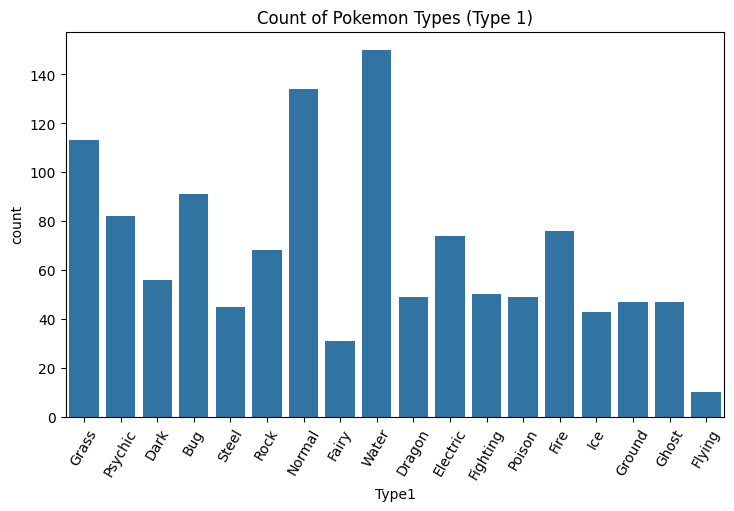

In [15]:
plt.figure(figsize=(8.5,5))

sns.countplot(x = df_type['Type1'])
plt.xticks(rotation=60)
plt.title('Count of Pokemon Types (Type 1)')
plt.show()

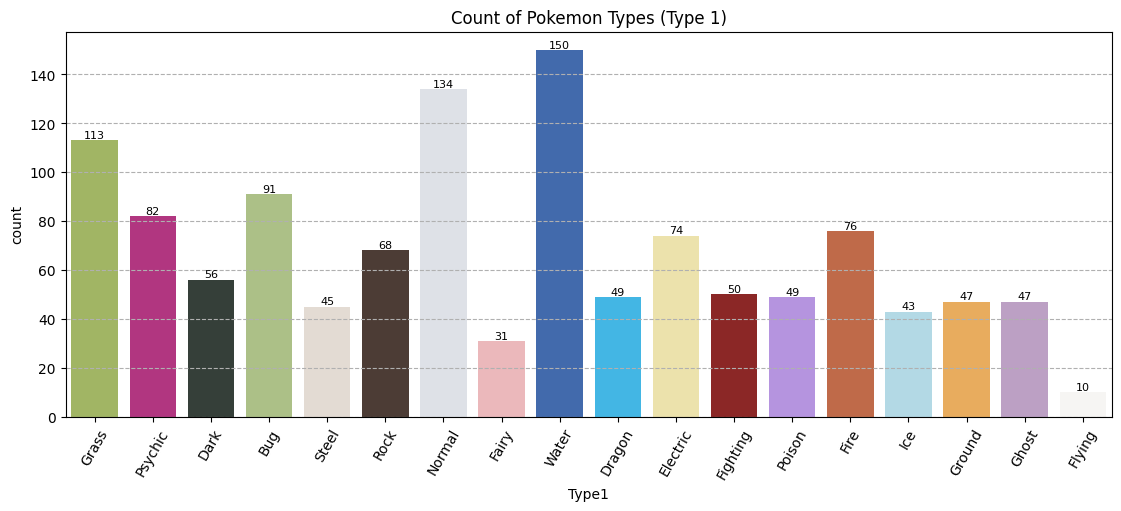

In [16]:
type_colors = {
    'Grass': '#A8C256',
    'Psychic': '#C52184',
    'Dark': '#334139',
    'Bug': '#AFC97E',
    'Steel': '#E6DBD0',
    'Rock': '#503B31',
    'Normal': '#DCE1E9',
    'Fairy': '#F4AFB4',
    'Water': '#3066BE',
    'Dragon': '#28C2FF',
    'Electric':'#F7E9A1',
    'Fighting':'#9C1715',
    'Poison':'#B388EB',
    'Fire':'#D36135',
    'Ice':'#ABDDED',
    'Ground':'#FFAF47',
    'Ghost':'#BF9ACA',
    'Flying':'#F6F5F3'
}
type_order = df_type['Type1'].unique()
type_pallete = [type_colors.get(t) for t in type_order]

plt.figure(figsize=(13.5,5))

plt.grid(axis='y', linestyle='--', alpha = 1)
ax = sns.countplot(x = df_type['Type1'], order=type_order, palette=type_pallete)
for bar in ax.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom', fontsize=8)
plt.xticks(rotation=60)
plt.title('Count of Pokemon Types (Type 1)')
plt.show()

## Heatmap

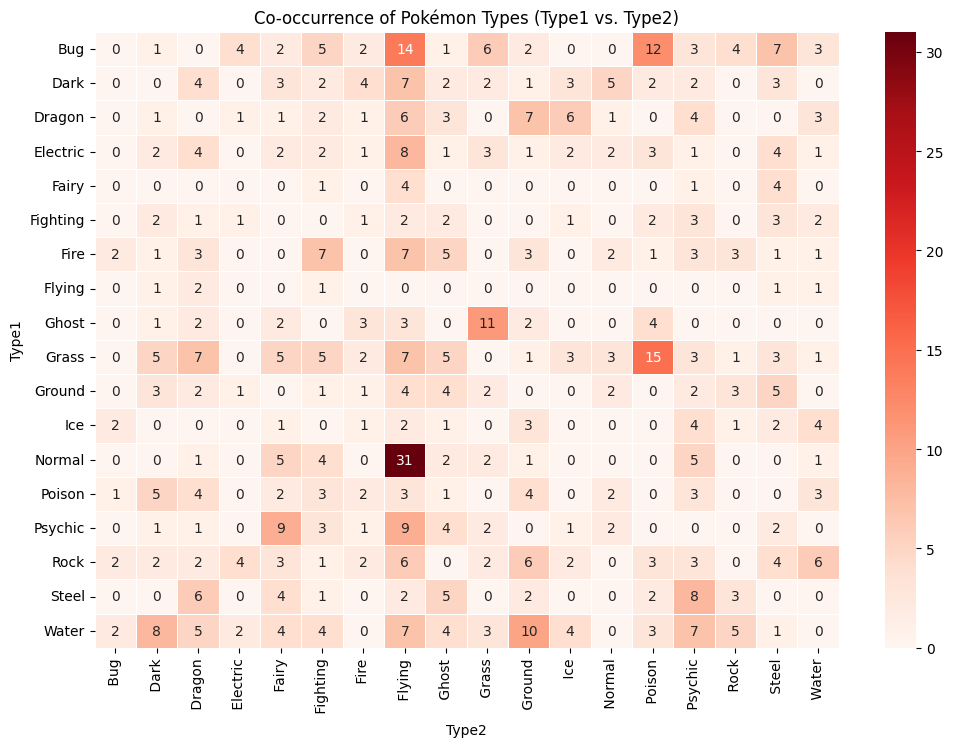

In [17]:
cross_tab = pd.crosstab(df_type['Type1'], df_type['Type2'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='Reds', annot=True, fmt='d', linewidths=0.5)
plt.title('Co-occurrence of Pokémon Types (Type1 vs. Type2)')
plt.xlabel('Type2')
plt.ylabel('Type1')
plt.show()

In [18]:
# Lets Find them!
df_type[(df_type['Type1'].str.contains('Bug')) & (df_type['Type2'].str.contains('Dark'))]

,Pokemon,Type1,Type2,Height (m),Weight (kg),Attack Base
580,Lokix,Bug,Dark,1.0,17.5,102


## Scatter Plot

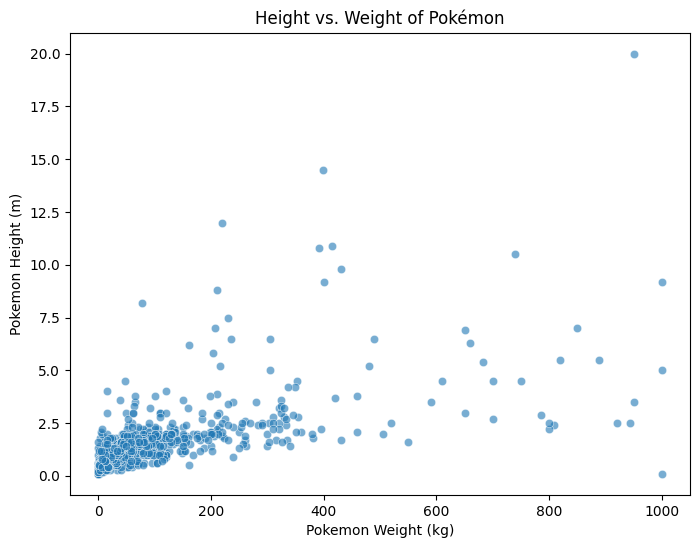

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight (kg)', y='Height (m)', data=df_type, alpha=0.6)
plt.title('Height vs. Weight of Pokémon')
plt.xlabel('Pokemon Weight (kg)')
plt.ylabel('Pokemon Height (m)')

# # Add a regression line
# sns.regplot(x='Weight (kg)', y='Height (m)', data=df_type, scatter=False, color='red')
plt.show()

## Most Powerful Pokemons?

In [20]:
df_att = dict(zip(df_type['Pokemon'], df_type['Attack Base']))
top20 = Counter(df_att).most_common(20)
top20

[('Mega Mewtwo X', 190),
 ('Mega Heracross', 185),
 ('Kartana', 181),
 ('Deoxys Attack Forme', 180),
 ('Primal Groudon', 180),
 ('Mega Rayquaza', 180),
 ('Mega Garchomp', 170),
 ('Black Kyurem', 170),
 ('Ultra Necrozma', 167),
 ('Mega Banette', 165),
 ('Calyrex Ice Rider', 165),
 ('Mega Gallade', 165),
 ('Rampardos', 165),
 ('Mega Tyranitar', 164),
 ('Mega Blaziken', 160),
 ('Darmanitan Galarian Zen Mode', 160),
 ('Mega Diancie', 160),
 ('Hoopa Unbound', 160),
 ('Palafin Hero Form', 160),
 ('Regigigas', 160)]

Here are the top 20 Strongest Pokemon

Text(0.5, 1.0, 'Base Attack per Pokemon')

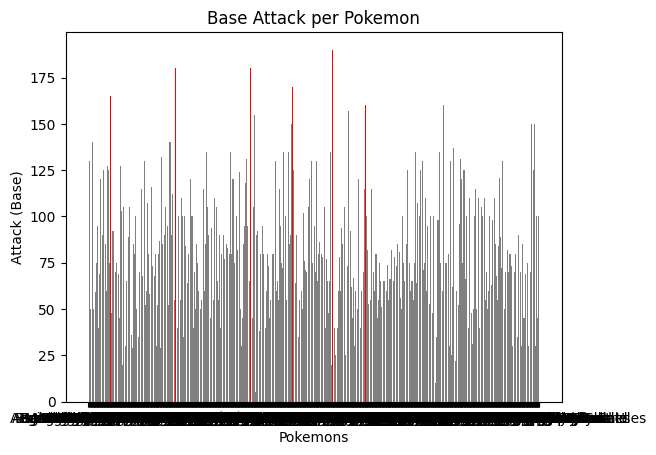

In [21]:
top20_keys = [item[0] for item in top20]
top20_colors = ['red' if key in top20_keys else 'gray' for key in df_att.keys()]

plt.bar(df_att.keys(), df_att.values(), color = top20_colors)
plt.xlabel('Pokemons')
plt.ylabel('Attack (Base)')
plt.title('Base Attack per Pokemon')

This right here? Ugly.

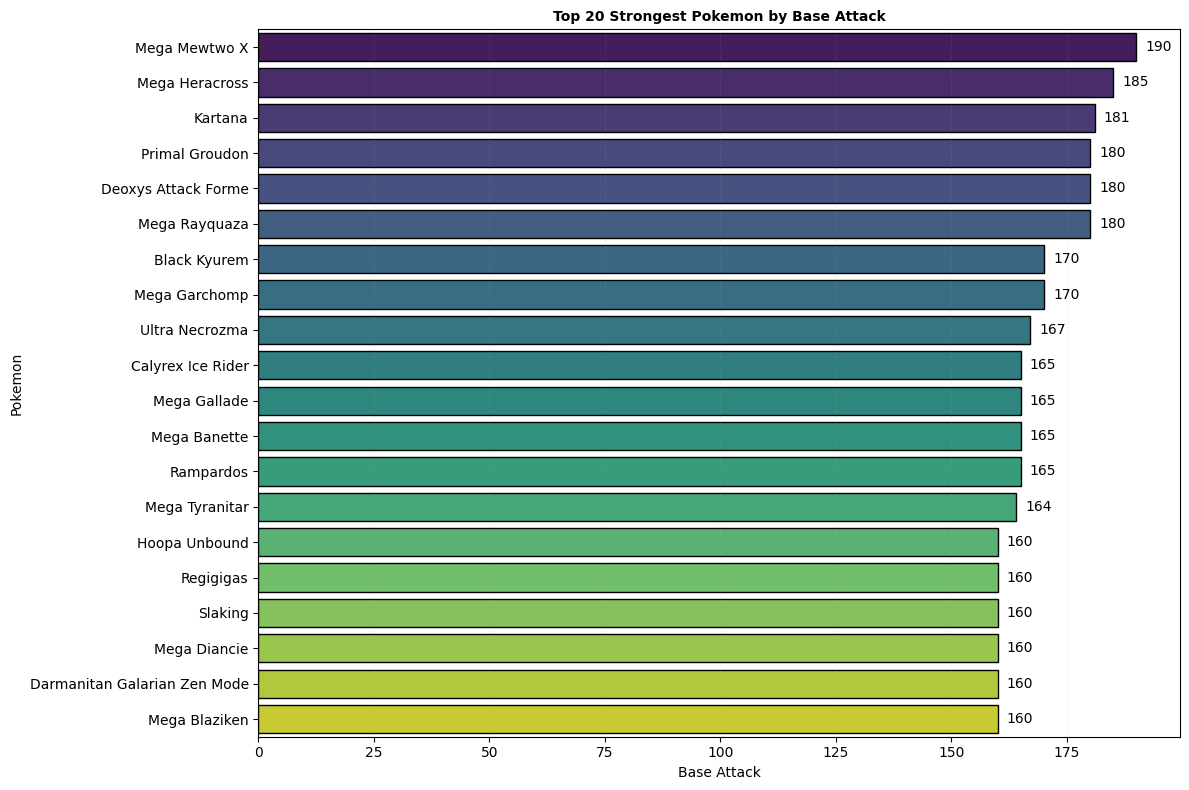

In [22]:
top20_attack = df_type.sort_values('Attack Base', ascending=False).head(20)
plt.figure(figsize=(12,8))
bar = sns.barplot(
    x='Attack Base',
    y='Pokemon',
    data=top20_attack,
    palette='viridis',
    edgecolor='black'
)

for p in bar.patches:
    width = p.get_width()
    plt.text(
        width +2, 
        p.get_y() + p.get_height() / 2, 
        f'{int(width)}',
        ha = 'left',
        va = 'center',
        fontsize = 10
    )

plt.title('Top 20 Strongest Pokemon by Base Attack', fontsize=10, weight='bold')
plt.xlabel('Base Attack')
plt.ylabel('Pokemon')
plt.grid(axis='x', linestyle = '--', alpha=0.1)

plt.tight_layout()
plt.show()

In [24]:
#### LETS PRETTIFY SOME THINGS ####
import plotly.express as px

In [36]:
fig = px.scatter(df_type,
                 x='Weight (kg)',
                 y='Height (m)',
                 hover_name='Pokemon',
                 hover_data={
                     'Weight (kg)': ':.1f', 
                     'Height (m)': ':.2f'},
                 opacity = 0.6,
                 title= "Height vs. Weight of Pokemon")

fig.update_layout(
    width = 800,
    height = 600,
    xaxis_title = 'Weight (kg)',
    yaxis_title = 'Height (m)',
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

fig.add_traces(
    px.scatter(df_type, x='Weight (kg)', y='Height (m)', trendline="ols", trendline_color_override='red').data[1]
)


fig.show()

In [30]:
# !pip install statsmodels

In [48]:
top20_weakest = df_type.sort_values('Attack Base').head(20)

fig = px.bar(top20_weakest,
             x='Attack Base',
             y='Pokemon',
             orientation='h',
             text='Attack Base',
             title='<b>Top 20 Weakest Pokémon by Base Attack</b>',
             color='Attack Base',
             color_continuous_scale='viridis',
             hover_data={
                 'Type1': True,
                 'Type2': True
             })

fig.update_layout(
    width=1200,
    height=800,
    xaxis=dict(
        title='<b>Base Attack</b>',
        gridcolor='lightgrey',
        gridwidth=0.5,
        showgrid=True
    ),
    yaxis=dict(
        title='',
        categoryorder='total ascending',
        tickfont=dict(size=12)
    ),
    coloraxis_showscale=False,
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family='Arial'
    ),
    title_x=0.5,
    margin=dict(l=50, r=50, b=100),
    plot_bgcolor='white'
)

fig.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside',
    marker_line_color='black',
    marker_line_width=0.5,
    textfont_size=12
)

fig.show()